In [69]:
from cvm.utils import UnitConvert as uc
from matplotlib import pyplot as plt

from pprint import pprint

from cvm.A1 import Tetrahedron, TetraOctahedron
from cvm.sample import Sample
from cvm.vibration import ClusterVibration

from cvm.utils import parse_formula, mixed_atomic_weight, parse_input_set, UnitConvert, cvm_context
import numpy as np
import pandas as pd

In [73]:
inp = parse_input_set('AlMg')

In [74]:
tetra = Tetrahedron(**inp)

with cvm_context(simple_print='True'):
    print(tetra)

Tetrahedron:
  | 
  |-meta:
  |   |-host: al
  |   |-impurity: mg
  |   |-prefix: 
  |   |-suffix: vib_to
  |   |-description: almg solubility limit calculation with tetrahedron approximation
  |   |-structure: a1
  |   |-timestamp: 2019-06-23 19:43:06
  | 
  |-tag_800k-<$T_\mathrm{FD}=800$K>-<skip: False>


In [75]:
sample = tetra.tag_800k

In [54]:
from collections import defaultdict

ret = defaultdict(list)

for i, (T, r_0) in enumerate(sample.ite(temperature=tetra.experiment['temperature'].values[::-1])):
    ret['Temperature'].append(T)
    
    g = sample(T, r=r_0(tetra.experiment['concentration'].values[-i]))
    ret['$1st_{global}$'].append(g.pair1)
    ret['$2nd_{global}$'].append(g.pair2)
    ret['$triple_{global}$'].append(g.triple)
    ret['$tetra_{global}$'].append(g.tetra)
               
    l = sample(T)
    ret['$1st_{local}$'].append(l.pair1)
    ret['$2nd_{local}$'].append(l.pair2)
    ret['$triple_{local}$'].append(l.triple)
    ret['$tetra_{local}$'].append(l.tetra)

In [55]:
ret = pd.DataFrame(ret)
ret

,Temperature,$1st_{global}$,$2nd_{global}$,$triple_{global}$,$tetra_{global}$,$1st_{local}$,$2nd_{local}$,$triple_{local}$,$tetra_{local}$
0,372.15,0.043782,-0.000323,0.007094,0.002114,-0.100648,-0.099645,0.025290,-0.007132
1,414.15,0.045211,-0.000882,0.007842,0.002515,-0.100118,-0.099208,0.025231,-0.007073
2,461.15,0.044645,-0.001061,0.007723,0.002476,-0.099511,-0.098708,0.025163,-0.007005
3,497.15,0.044173,-0.001197,0.007621,0.002440,-0.099038,-0.098317,0.025111,-0.006950
4,523.15,0.043791,-0.001293,0.007532,0.002408,-0.098693,-0.098031,0.025073,-0.006909
5,551.15,0.043381,-0.001403,0.007441,0.002376,-0.098317,-0.097719,0.025032,-0.006865
6,572.15,0.043037,-0.001483,0.007360,0.002346,-0.098033,-0.097484,0.025002,-0.006831
7,591.65,0.042702,-0.001560,0.007280,0.002317,-0.097767,-0.097263,0.024973,-0.006799
8,611.65,0.042356,-0.001642,0.007200,0.002288,-0.097493,-0.097035,0.024943,-0.006765
9,628.15,0.042043,-0.001710,0.007125,0.002260,-0.097265,-0.096845,0.024919,-0.006738


In [65]:
ret.to_excel('interaction_energy.xlsx', index=None)

In [76]:
sample._temp

array([ 400.        ,  608.06467632,  681.71519266,  727.55706609,
        760.92548139,  787.17643739,  808.81881909,  827.23165842,
        843.25481987,  857.4379308 ,  870.1604046 ,  881.69519468,
        892.24523879,  901.9655305 ,  910.97712535,  919.37637866,
        927.24123952,  934.63565951,  941.61275569,  948.2171277 ,
        954.48658684,  960.45346738,  966.14563586,  971.58727806,
        976.79951999,  981.8009232 ,  986.60788373,  991.23495644,
        995.69512073, 1000.        ])

In [77]:
for status in tetra(verbose=False):
    print('1st: %.5f eV' % (status.int_energy.pair1))
    print('2nd: %.5f eV' % (status.int_energy.pair2))
    print('triple: %.5f eV' % (status.int_energy.triple))
    print('tetra: %.5f eV' % (status.int_energy.tetra))
    print('T=%6.3f' % status.temperature, 'Concentration=%6.4f%%' % (status.concentration * 100), 'Counts=%s' % status.num_of_ite, '\n')    

1st: 0.03872 eV
2nd: -0.00031 eV
triple: 0.00515 eV
tetra: 0.00119 eV
T=400.000 Concentration=52.2866% Counts=34 

1st: 0.03591 eV
2nd: -0.00167 eV
triple: 0.00493 eV
tetra: 0.00126 eV
T=608.065 Concentration=51.9597% Counts=27 

1st: 0.03487 eV
2nd: -0.00217 eV
triple: 0.00485 eV
tetra: 0.00129 eV
T=681.715 Concentration=51.8677% Counts=26 

1st: 0.03421 eV
2nd: -0.00248 eV
triple: 0.00481 eV
tetra: 0.00131 eV
T=727.557 Concentration=51.8157% Counts=28 

1st: 0.03372 eV
2nd: -0.00271 eV
triple: 0.00477 eV
tetra: 0.00132 eV
T=760.925 Concentration=51.7800% Counts=29 

1st: 0.03333 eV
2nd: -0.00289 eV
triple: 0.00475 eV
tetra: 0.00134 eV
T=787.176 Concentration=51.7531% Counts=29 

1st: 0.03301 eV
2nd: -0.00304 eV
triple: 0.00472 eV
tetra: 0.00135 eV
T=808.819 Concentration=51.7318% Counts=30 

1st: 0.03274 eV
2nd: -0.00317 eV
triple: 0.00470 eV
tetra: 0.00136 eV
T=827.232 Concentration=51.7142% Counts=30 

1st: 0.03249 eV
2nd: -0.00329 eV
triple: 0.00469 eV
tetra: 0.00136 eV
T=843.255 

In [78]:
tetra.results.tag_800k

,temperature,concentration,num_of_ite,pair1,pair2,triple,tetra
0,400.0,0.053674,1,0.045345,-0.000820,0.007863,0.002520
1,400.0,0.163283,2,0.044860,-0.000701,0.007650,0.002411
2,400.0,0.285956,3,0.043566,-0.000474,0.007090,0.002126
3,400.0,0.376836,4,0.042002,-0.000330,0.006435,0.001798
4,400.0,0.435320,5,0.040778,-0.000287,0.005941,0.001558
5,400.0,0.470777,6,0.039965,-0.000285,0.005623,0.001408
6,400.0,0.491885,7,0.039464,-0.000291,0.005431,0.001319
7,400.0,0.504416,8,0.039163,-0.000298,0.005317,0.001267
8,400.0,0.511864,9,0.038984,-0.000303,0.005250,0.001237
9,400.0,0.516299,10,0.038877,-0.000307,0.005210,0.001219


In [38]:
def patch(_, r0):

    _1st = -0.081 + (-0.00365 * (r0 - 7.85) / 0.1)
    
    return {'pair1': -_1st}

In [39]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def percent(x, pos=0):
    return u'{:3.1f}'.format(100 * x)


def process(meta, *results, experiment=None):    

    def percent(x, pos=0):
        return u'{:3.1f}'.format(100 * x)
    
    fig, ax = plt.subplots(figsize=(8, 4.5), dpi=150)  # 800 * 500
    plt.subplots_adjust(top=0.97, bottom=0.14, left=0.12, right=0.97)

    # draw experiment
    if experiment is not None:
        y_exp = experiment['temperature']
        x_exp = experiment['concentration']
        # ax.annotate('1200$K$', (0.005, 410), fontsize=13)
        ax.plot(
            x_exp, y_exp, 'x--', mew=3, mfc='w', ms=6, lw=1.5, label='Experiment')

    # draw results
    line_type = ['o-', 'o--', 'o:']
    for i, res in enumerate(results):
        # plt.xlim(xmin=0.5, xmax=12.5)
        # plt.axhline(y=0, color='k', ls='-', lw=1.0)
        # label[i] = 'int= ' + '{:07.4}'.format(Results[i]['1st_int'])
        ax.plot(
            res['c'],
            res['temp'],
            # 'o-',
            line_type[i],
            color='darkorange',
            ms=4,
            lw=1.5,
            label=res['label'])

    # set formater
    ax.xaxis.set_major_formatter(FuncFormatter(percent))
    ax.set_xlim(0, 0.122)

    # for preview
    ax.grid(axis='y')
    ax.tick_params(labelsize=14.5)
    ax.set_ylabel(r'Temperature, $T$/K', size=16)
    ax.set_xlabel(
        r'Concentration of ' + meta['impurity'].capitalize() +
        r', $c$/at$\%$',
        size=16)
#     ax.annotate(
#         r'(b)CVMTO10, with thermal vibration effect', (0.003, 1830), size=15)
#     ax.annotate(r'$T_\mathrm{FD}=1600$K', (0.004, 1630), size=17)
    ax.legend(loc='lower right', markerscale=1.2, fontsize=15)
    fig_name = "_".join(
        (meta['prefix'], meta['host'], meta['impurity'],
         meta['suffix'])).lstrip('_')
#     plt.savefig(fig_name, dpi=600)  # 300 dpi
    plt.show()



In [40]:
for status in tetra(sample_paras=dict(energy_patch=patch, vibration=False), verbose=False):
    print('1st: %.5f eV' % (status.int_energy.pair1))
    print('2nd: %.5f eV' % (status.int_energy.pair2))
    print('triple: %.5f eV' % (status.int_energy.triple))
    print('tetra: %.5f eV' % (status.int_energy.tetra))
    print('T=%6.3f' % status.temperature, 'Concentration=%6.4f%%' % (status.concentration * 100), 'Counts=%s' % status.num_of_ite, '\n')

1st: -0.04752 eV
2nd: 0.00065 eV
triple: 0.00859 eV
tetra: 0.00271 eV
T=500.000 Concentration=0.9269% Counts=78 

1st: -0.04750 eV
2nd: 0.00067 eV
triple: 0.00857 eV
tetra: 0.00270 eV
T=532.759 Concentration=1.3263% Counts=103 

1st: -0.04748 eV
2nd: 0.00070 eV
triple: 0.00854 eV
tetra: 0.00269 eV
T=565.517 Concentration=1.8496% Counts=113 

1st: -0.04746 eV
2nd: 0.00073 eV
triple: 0.00851 eV
tetra: 0.00267 eV
T=598.276 Concentration=2.5312% Counts=125 

1st: -0.04742 eV
2nd: 0.00077 eV
triple: 0.00847 eV
tetra: 0.00265 eV
T=631.034 Concentration=3.4226% Counts=142 

1st: -0.04738 eV
2nd: 0.00082 eV
triple: 0.00841 eV
tetra: 0.00261 eV
T=663.793 Concentration=4.6067% Counts=168 

1st: -0.04733 eV
2nd: 0.00089 eV
triple: 0.00832 eV
tetra: 0.00257 eV
T=696.552 Concentration=6.2361% Counts=210 

1st: -0.04726 eV
2nd: 0.00098 eV
triple: 0.00820 eV
tetra: 0.00250 eV
T=729.310 Concentration=8.6635% Counts=298 

1st: -0.04712 eV
2nd: 0.00117 eV
triple: 0.00793 eV
tetra: 0.00235 eV
T=762.069 C

In [42]:
tetra.results.tag_800k

,temperature,concentration,num_of_ite,pair1,pair2,triple,tetra
0,500.0,0.009839,1,-0.047513,0.000658,0.008584,0.002712
1,500.0,0.009747,2,-0.047513,0.000658,0.008585,0.002712
2,500.0,0.009685,3,-0.047513,0.000657,0.008585,0.002712
3,500.0,0.009636,4,-0.047514,0.000657,0.008586,0.002713
4,500.0,0.009595,5,-0.047514,0.000657,0.008586,0.002713
5,500.0,0.009560,6,-0.047514,0.000656,0.008586,0.002713
6,500.0,0.009529,7,-0.047514,0.000656,0.008586,0.002713
7,500.0,0.009501,8,-0.047514,0.000656,0.008586,0.002713
8,500.0,0.009477,9,-0.047514,0.000656,0.008586,0.002713
9,500.0,0.009455,10,-0.047514,0.000656,0.008587,0.002713


In [15]:
tmp.results

Results:
  |-<$T_\mathrm{FD}=800$K>

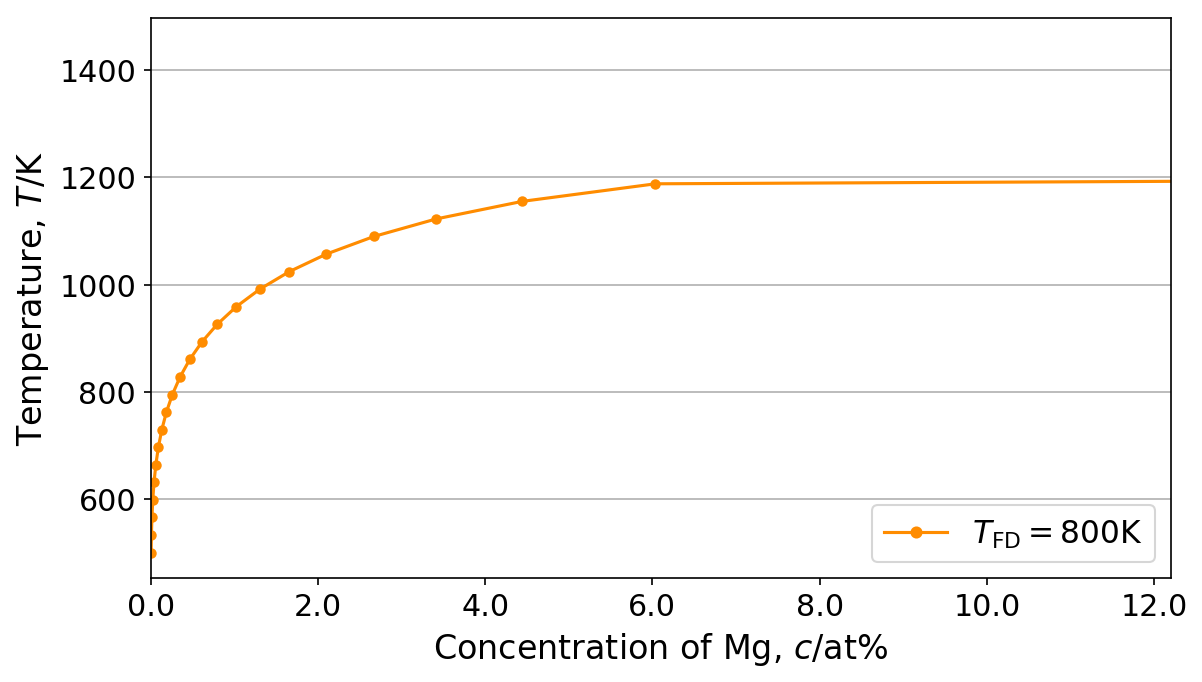

In [39]:
process(tmp.meta, dict(temp=temp, c=con, label='$T_\\mathrm{FD}=800$K'))

* T=900.0 Concentration=0.1322374574878373 Counts=214